In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [45]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [135]:
#i = 0
#while( i < train_df.shape[1]):
#    print(train_df.iloc[:,i:i+10].describe())
#    i = i + 10

In [47]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [48]:
print(train_df.shape)
print(test_df.shape)

(69999, 172)
(30000, 171)


In [49]:
train_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [51]:
obj_cols = train_df.columns[train_df.dtypes == 'object']
obj_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [52]:
train_df[obj_cols].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


In [53]:
train_df.drop("id", inplace=True, axis=1)
test_df.drop("id", axis=1, inplace=True)

### Lets drop the date columns for now

In [54]:
train_df.drop(obj_cols, axis=1, inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 162 entries, circle_id to churn_probability
dtypes: float64(135), int64(27)
memory usage: 86.5 MB


In [55]:
train_df.shape

(69999, 162)

In [56]:
test_df.drop(obj_cols, axis=1, inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 161 entries, circle_id to jun_vbc_3g
dtypes: float64(135), int64(26)
memory usage: 36.9 MB


In [57]:
test_df.shape

(30000, 161)

#### Drop features with more than 30% missing values

In [58]:
na_features_30 = train_df.columns[train_df.isna().mean() > 0.3]
print(na_features_30.shape)
print(na_features_30)

(27,)
Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')


In [59]:
train_df.drop(na_features_30,axis=1, inplace=True)
test_df.drop(na_features_30,axis=1, inplace=True)

#### Fill remaining na with mean values

In [60]:
mean_values = train_df.mean()

train_df.fillna(mean_values, inplace=True)
test_df.fillna(mean_values, inplace=True)

In [61]:
train_df.columns[train_df.isna().sum() > 0]

Index([], dtype='object')

In [63]:
train_df.shape

(69999, 135)

#### Drop rows with missing values

In [18]:
train_df.dropna(inplace=True)
train_df.shape

(69999, 135)

In [19]:
test_df.dropna(inplace=True)
test_df.shape

(30000, 134)

#### Combine columns 6,7,8 except
- circle_id  loc_og_t2o_mou  std_og_t2o_mou loc_ic_t2o_mou
- aon    aug_vbc_3g    jul_vbc_3g   jun_vbc_3g churn_probability

In [116]:
reg_cols = ["circle_id", "loc_og_t2o_mou" , "std_og_t2o_mou" ,"loc_ic_t2o_mou", "aon" ,   "aug_vbc_3g" ,   "jul_vbc_3g" ,  "jun_vbc_3g" ,"churn_probability"]
reg_cols = set(reg_cols)

cols = set(train_df.columns)

rep_cols = sorted(list(reg_cols.symmetric_difference(cols)))
print(len(rep_cols))

reg_cols = list(reg_cols)
reg_cols_test = [col for col in reg_cols if col != 'churn_probability']

feat_engg_df = pd.DataFrame()
feat_engg_df_test = pd.DataFrame()

i=0
while(i<len(rep_cols)):
    col_name = rep_cols[i][:-1] + "sum"
    feat_engg_df.loc[:,col_name] = np.sum(train_df.loc[:,[rep_cols[i], rep_cols[i+1], rep_cols[i+2]]],axis=1)
    feat_engg_df_test.loc[:,col_name] = np.sum(test_df.loc[:,[rep_cols[i], rep_cols[i+1], rep_cols[i+2]]],axis=1)
    i = i + 3

feat_engg_df[reg_cols] = train_df[reg_cols]
feat_engg_df_test[reg_cols_test] = test_df[reg_cols_test]
feat_engg_df.head()

126


,arpu_sum,ic_others_sum,isd_ic_mou_sum,isd_og_mou_sum,last_day_rch_amt_sum,loc_ic_mou_sum,loc_ic_t2f_mou_sum,loc_ic_t2m_mou_sum,loc_ic_t2t_mou_sum,loc_og_mou_sum,...,vol_3g_mb_sum,aug_vbc_3g,jul_vbc_3g,churn_probability,aon,circle_id,loc_ic_t2o_mou,std_og_t2o_mou,loc_og_t2o_mou,jun_vbc_3g
0,125.813,1.80,0.0,0.0,130,52.73,0.00,38.82,13.90,26.18,...,0.00,0.0,0.0,0,1958,109,0.0,0.0,0.0,0.0
1,165.740,0.00,0.0,0.0,0,67.91,5.41,31.18,31.30,0.00,...,3.96,0.0,0.0,0,710,109,0.0,0.0,0.0,0.0
2,163.982,0.25,0.0,0.0,120,155.73,0.00,138.55,17.16,37.62,...,0.00,0.0,0.0,0,882,109,0.0,0.0,0.0,0.0
3,472.717,0.00,0.0,0.0,270,217.13,8.04,155.36,53.70,117.38,...,0.00,0.0,0.0,0,982,109,0.0,0.0,0.0,0.0
4,470.464,0.00,0.0,0.0,65,59.21,15.28,34.40,9.49,100.61,...,0.00,0.0,0.0,0,647,109,0.0,0.0,0.0,0.0


In [117]:
feat_engg_df_test.head()

,arpu_sum,ic_others_sum,isd_ic_mou_sum,isd_og_mou_sum,last_day_rch_amt_sum,loc_ic_mou_sum,loc_ic_t2f_mou_sum,loc_ic_t2m_mou_sum,loc_ic_t2t_mou_sum,loc_og_mou_sum,...,vol_2g_mb_sum,vol_3g_mb_sum,aug_vbc_3g,jul_vbc_3g,aon,circle_id,loc_ic_t2o_mou,std_og_t2o_mou,loc_og_t2o_mou,jun_vbc_3g
0,221.657,0.00,0.00,0.0,60,114.48,0.26,24.33,89.87,117.15,...,0.0,0.0,0.00,0.00,1692,109,0.0,0.0,0.0,0.00
1,1290.604,0.00,386.74,0.8,250,518.36,1.49,467.29,49.55,1586.26,...,0.0,0.0,0.00,0.00,2533,109,0.0,0.0,0.0,0.00
2,1510.967,0.00,0.00,0.0,0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,525.61,758.41,277,109,0.0,0.0,0.0,241.84
3,239.340,0.00,10.08,0.0,260,1582.56,2.02,1444.71,135.79,129.73,...,0.0,0.0,0.00,0.00,1244,109,0.0,0.0,0.0,0.00
4,1126.472,0.16,0.00,0.0,310,37.33,0.00,27.05,10.27,31.79,...,0.0,0.0,0.00,0.00,462,109,0.0,0.0,0.0,0.00


### Feature Split

In [107]:
y_train = feat_engg_df["churn_probability"]
X_train = feat_engg_df.copy()
X_train.pop("churn_probability")

0        0
1        0
2        0
3        0
4        0
        ..
69994    0
69995    0
69996    0
69997    0
69998    0
Name: churn_probability, Length: 69999, dtype: int64

In [20]:
y_train = train_df["churn_probability"]
X_train = train_df.copy()
X_train.pop("churn_probability")

0        0
1        0
2        0
3        0
4        0
        ..
69994    0
69995    0
69996    0
69997    0
69998    0
Name: churn_probability, Length: 69999, dtype: int64

### Scaling

In [122]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
#X_test = ss.transform(test_df)
X_test = ss.transform(feat_engg_df_test)

## PCA

In [123]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [124]:
pca.components_

array([[ 3.23730737e-01,  2.20676946e-02,  3.88974767e-02, ...,
         0.00000000e+00,  0.00000000e+00,  9.79601548e-02],
       [-4.70987767e-02,  2.06476228e-02,  4.34009533e-02, ...,
        -0.00000000e+00, -0.00000000e+00,  2.23777151e-01],
       [ 1.08561663e-01, -3.59752373e-02, -4.07684398e-02, ...,
         0.00000000e+00,  0.00000000e+00,  2.94147737e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00, -9.68390554e-15, -5.22187203e-14, ...,
         0.00000000e+00,  0.00000000e+00,  1.79409784e-16]])

In [125]:
pca.explained_variance_

array([6.91039135e+00, 4.15477725e+00, 3.44123669e+00, 2.40626049e+00,
       2.11096553e+00, 1.70991193e+00, 1.53014057e+00, 1.47173031e+00,
       1.42575429e+00, 1.39154465e+00, 1.32893483e+00, 1.21998923e+00,
       1.19120482e+00, 1.06525418e+00, 1.00946162e+00, 9.92758798e-01,
       9.35867600e-01, 8.75893204e-01, 8.18047898e-01, 7.82855157e-01,
       7.79651787e-01, 7.58470411e-01, 7.32887862e-01, 6.66547495e-01,
       6.40463317e-01, 5.17450587e-01, 4.78764950e-01, 4.54871202e-01,
       4.51033122e-01, 4.25502031e-01, 3.95563871e-01, 2.77651026e-01,
       2.23366358e-01, 2.13939817e-01, 1.77808710e-01, 1.97911427e-02,
       1.09461123e-02, 2.79451175e-03, 1.43868466e-04, 2.13344910e-09,
       5.70929567e-10, 2.34074766e-10, 1.20234254e-10, 3.13105076e-11,
       4.43660373e-32, 4.43660373e-32, 4.43660373e-32, 4.43660373e-32,
       4.43660373e-32, 4.43660373e-32])

### 80% of variance are explained by 20 PCA features

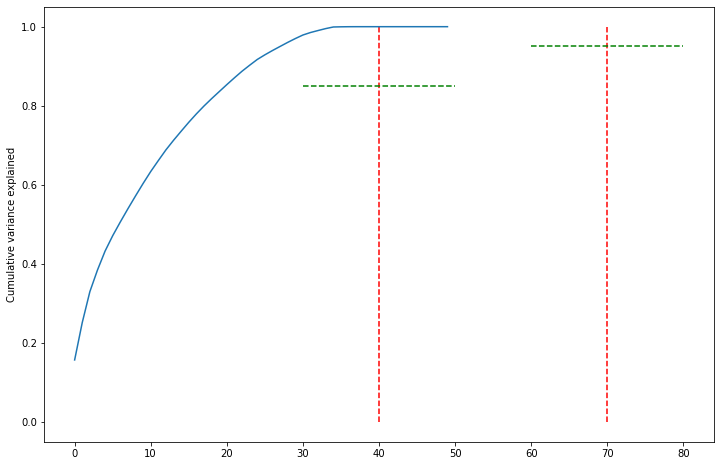

In [126]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.vlines(x=40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=60, colors="g", linestyles="--")
plt.hlines(y=0.85, xmax=50, xmin=30, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Modeling

In [127]:
ipca = IncrementalPCA(n_components=20)
X_train_pca = ipca.fit_transform(X_train)
X_train_pca.shape

(69999, 20)

In [128]:
lr_pca = LogisticRegression(max_iter=200)
model_pca = lr_pca.fit(X_train_pca, y_train)

In [129]:
svc = SVC()
model_svc_pca = svc.fit(X_train_pca,y_train)

KeyboardInterrupt: 

#### Evaluate 

In [130]:
#X_test = ipca.transform(test_df.values)
X_test = ipca.transform(feat_engg_df_test.values)
X_test.shape

(30000, 20)

In [131]:
y_pred = model_pca.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [132]:
y_pred_df = pd.DataFrame(y_pred, index=np.arange(69999, 99999)).reset_index()
y_pred_df.columns = ["id","churn_probability"]

y_pred_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [134]:
y_pred_df.to_csv("Krishna_Praveen_Piyush.csv", index=False)

In [39]:
y_pred_svc = model_svc_pca.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

#### GridSearchCV

In [28]:
pipeline = Pipeline([
    ('pca',IncrementalPCA()),
    ('clf', None)
])
parameters = [
    {
    'pca__n_components' : (40, 50, 60, 70, 80),
    'clf' : (LogisticRegression(),)
    },
#    {
#    'pca__n_components' : (40, 50, 60, 70, 80),
#    'clf' : (SVC(),)
#    }
]

cv = GridSearchCV(pipeline, parameters,
                        scoring= 'accuracy',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1) 


cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', IncrementalPCA()),
                                       ('clf', None)]),
             param_grid=[{'clf': (LogisticRegression(),),
                          'pca__n_components': (40, 50, 60, 70, 80)}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [29]:
cv.best_estimator_

Pipeline(steps=[('pca', IncrementalPCA(n_components=80)),
                ('clf', LogisticRegression())])

In [30]:
cv.best_score_

0.9094415386813344

In [31]:
cv.cv_results_

{'mean_fit_time': array([2.00111361, 1.91065693, 1.92388968, 1.81748323, 1.97981477]),
 'std_fit_time': array([0.1524365 , 0.13465528, 0.08304747, 0.10214462, 0.05392479]),
 'mean_score_time': array([0.00837359, 0.01009507, 0.01519747, 0.0092834 , 0.00938964]),
 'std_score_time': array([0.00271608, 0.00247682, 0.01498656, 0.00093515, 0.00295858]),
 'param_clf': masked_array(data=[LogisticRegression(), LogisticRegression(),
                    LogisticRegression(), LogisticRegression(),
                    LogisticRegression()],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_pca__n_components': masked_array(data=[40, 50, 60, 70, 80],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf': LogisticRegression(), 'pca__n_components': 40},
  {'clf': LogisticRegression(), 'pca__n_components': 50},
  {'clf': LogisticRegression(), 'pca__n_components': 60}

#### to-do
- train-test split on train.csv
- remove cols with low variance / std after scaling
    - circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_ic_t2o_mou_6 , std_ic_t2o_mou_7, std_ic_t2o_mou_8
- feature engineering : combine cols -> recharge_6/7/8